In [1]:
from tensorflow import keras
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
NUM_CLASSES = 10
def load_data():
    (x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    return(x_train,y_train), (x_test,y_test)

def build_model():
    model = Sequential([
        Conv2D(32,3,activation="relu"),
        Conv2D(64,3,activation="relu"),
        MaxPooling2D(),
        Flatten(),
     cu   Dense(100,activation="relu"),
        Dense(10,activation="softmax")
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = "categorical_crossentropy",metrics=["acracy"])

    return model

In [3]:
(x_train,y_train),(x_test,y_test) = load_data()
model = build_model()
model.fit(x_train,y_train,batch_size=200,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
300/300 [==============================] - 39s 122ms/step - loss: 6.4484 - accuracy: 0.7657 - val_loss: 0.5392 - val_accuracy: 0.7883
Epoch 2/10
300/300 [==============================] - 36s 120ms/step - loss: 0.4579 - accuracy: 0.8258 - val_loss: 0.4859 - val_accuracy: 0.8221
Epoch 3/10
300/300 [==============================] - 39s 130ms/step - loss: 0.4061 - accuracy: 0.8457 - val_loss: 0.4475 - val_accuracy: 0.8342
Epoch 4/10
300/300 [==============================] - 39s 131ms/step - loss: 0.3769 - accuracy: 0.8560 - val_loss: 0.4412 - val_accuracy: 0.8420
Epoch 5/10
300/300 [==============================] - 37s 124ms/step - loss: 0.3490 - accuracy: 0.8662 - val_loss: 0.4200 - val_accuracy: 0.8448
Epoch 6/10
300/300 [==============================] - 36s 122ms/step - loss: 0.3374 - accuracy: 0.8717 - val_loss: 0.4276 - val_accuracy: 0.8463
Epoch 7/10
300/300 [==============================] - 37s 124ms/step - loss: 0.3163 - accuracy: 0.8796 - val_loss: 0.4186 - val_ac

In [4]:
loss, acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4350 - accuracy: 0.8538


In [5]:
print(acc)

0.8537999987602234


1/1 [==============================] - 0s 13ms/step


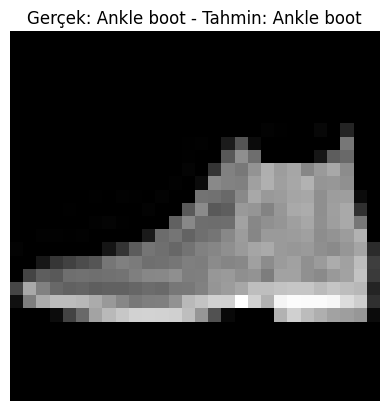

1/1 [==============================] - 0s 13ms/step


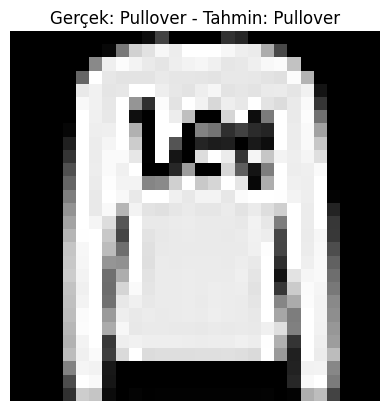

1/1 [==============================] - 0s 14ms/step


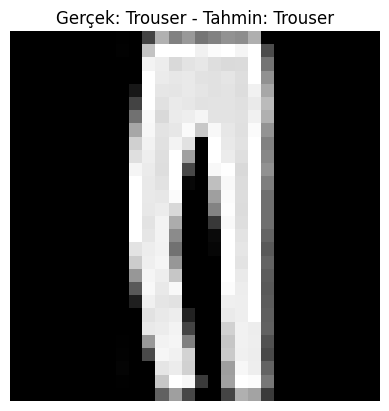

1/1 [==============================] - 0s 14ms/step


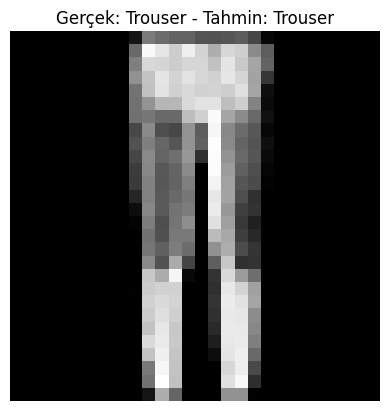

1/1 [==============================] - 0s 14ms/step


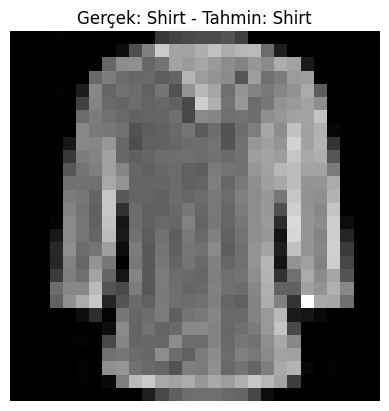

In [7]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(5):
    img = x_test[i]
    label = np.argmax(y_test[i])  # Gerçek sınıf
    prediction = model.predict(np.expand_dims(img, axis=0))  # Model tahmini
    predicted_class = np.argmax(prediction)

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Gerçek: {class_names[label]} - Tahmin: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()
